# Instruções

Ao longo deste curso aplicamos diversas técnicas de combinação de modelos. Agora, que tal se aventurar em um outro problema de classificação?

Nesse desafio, quero que você faça a classificação de clientes de um banco. O nosso alvo de classificação é a coluna y do dataset. Essa coluna indica se o cliente do banco fez ou não o depósito em uma conta após ser submetido a uma campanha de marketing.

Quero que você combine diferentes tipos de modelo usando o StackingCVClassifier para gerar uma previsão interessante. Ao final do processo verifique o score do resultado comparando a sua previsão com os dados de teste.

**Atenção**: a coluna y está no **meio** do dataset (coluna 11).

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/bank_additional_full_processed.csv')
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_blue-collar                41188 non-null  int64  
 12  job_entrepreneur               41188 non-null 

In [4]:
df.isna().sum().sum()

0

Todas as colunas possuem valores numéricos e não há valores nulos.

In [8]:
X = df.drop('y', axis=1)
y = df['y']

In [9]:
y.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

Os dados estão bem desbalanceados. Fica como **TODO** realizar o balanceamento no futuro.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, stratify=y)

Vou tentar usar outros modelos para variar um pouco do que foi visto no curso:

Modelos base:

- LinearSVC

- KNeighborsClassifier

- RandomForestClassifier

Meta-modelo: 

- LogisticRegressionCV (ele já implementa uma estratégia de validação cruzada das entradas)

Irei usar os valores padrões de cada modelo. Fica como **TODO** usar alguma técnica para buscar os melhores hiperparâmetros para cada modelo.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from mlxtend.classifier import StackingCVClassifier

classifiers = [
    KNeighborsClassifier(),
    LinearSVC(),
    RandomForestClassifier()
]

meta_classifier = LogisticRegressionCV()

model = StackingCVClassifier(classifiers, meta_classifier)

In [12]:
model.fit(X_train, y_train)

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


StackingCVClassifier(classifiers=[KNeighborsClassifier(), LinearSVC(),
                                  RandomForestClassifier()],
                     meta_classifier=LogisticRegressionCV())

In [14]:
model.score(X_test, y_test)

0.9103214890016921

O modelo teve uma acurácia de 0.91032. 

Extraindo outras métricas:

In [16]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12062
           1       0.71      0.34      0.46      1531

    accuracy                           0.91     13593
   macro avg       0.82      0.66      0.71     13593
weighted avg       0.90      0.91      0.90     13593



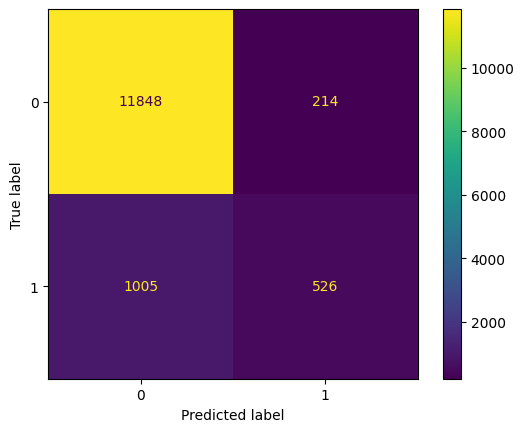

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Como suspeitado, o recall da classe positiva está baixo (0.34), provavelmente devido ao desbalanceamento dos dados.

Como curiosidade, segue os resultados para cada um dos modelo base individualmente:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12062
           1       0.60      0.48      0.53      1531

    accuracy                           0.91     13593
   macro avg       0.77      0.72      0.74     13593
weighted avg       0.90      0.91      0.90     13593



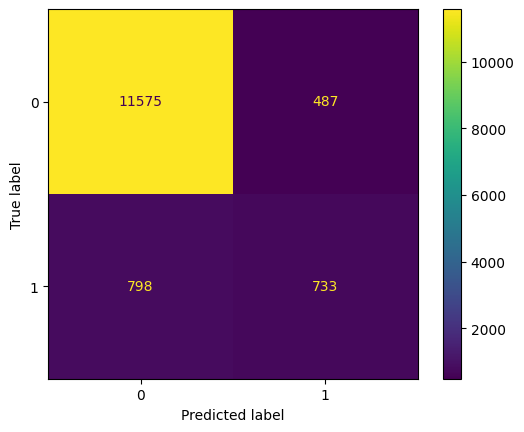

In [21]:
kneigh = KNeighborsClassifier()
kneigh.fit(X_train, y_train)
print(classification_report(y_test, kneigh.predict(X_test)))
ConfusionMatrixDisplay.from_predictions(y_test, kneigh.predict(X_test));

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12062
           1       0.63      0.41      0.50      1531

    accuracy                           0.91     13593
   macro avg       0.78      0.69      0.72     13593
weighted avg       0.90      0.91      0.90     13593



c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


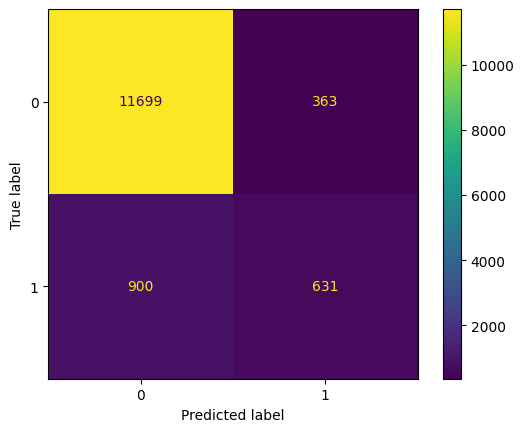

In [22]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
print(classification_report(y_test, lsvc.predict(X_test)))
ConfusionMatrixDisplay.from_predictions(y_test, lsvc.predict(X_test));

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12062
           1       0.66      0.48      0.56      1531

    accuracy                           0.91     13593
   macro avg       0.80      0.72      0.75     13593
weighted avg       0.91      0.91      0.91     13593



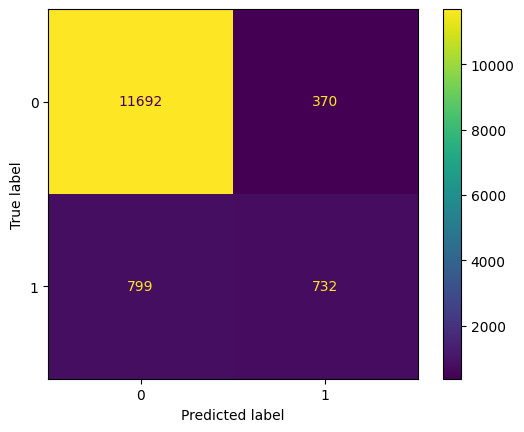

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))
ConfusionMatrixDisplay.from_predictions(y_test, rf.predict(X_test));

Todos os modelos obtiveram acurácia parecidas com o do modelo em stacking, e ainda conseguiram valores de recall melhores.

Solução do instrutor com outros modelos: https://github.com/alura-cursos/combina-classificadores/blob/main/mao_na_massa.ipynb

O valor da acurácia foi semelhante: 0.91661